In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

import functions.data_wrangling as data
import functions.eddy_feedback as ef 
import functions.plotting as plot

In [2]:
# delh60 = xr.open_mfdataset('/home/links/ct715/data_storage/isca/held-suarez/HS_T42_10y_60delh/run*/atmos_daily.nc',
#                            parallel=True, chunks={'time': 30})
# delh60

# # subset data and calculate ep fluxes
# ds3 = delh60[['ucomp', 'vcomp', 'temp']]
# ds3 = ef.calculate_epfluxes_ubar(ds3)
# # take final 90 days of data set
# ds3 = ds3.isel(time=slice(360, None))
# # flip pressure levels
# ds3 = ds3.sel(level=slice(None,None,-1))
# ds3.to_netcdf('/home/links/ct715/data_storage/isca/held-suarez/HS_T42_10y_60delh_EP.nc')


## $\Delta T_{eq} = 60$ (10 years)

In [3]:
delh60_10y = xr.open_mfdataset('/home/links/ct715/data_storage/isca/held-suarez/HS_T42_10y_60delh_EP.nc',
                         parallel=True, chunks={'time': 30})
delh60_10y

<xarray.Dataset>
Dimensions:  (time: 3240, level: 40, lat: 64, lon: 128)
Coordinates:
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * lat      (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 79.53 82.31 85.1 87.86
  * time     (time) object 2001-01-01 12:00:00 ... 2009-12-30 12:00:00
  * level    (level) float64 963.6 894.0 829.4 769.5 ... 14.38 9.534 5.934 1.651
Data variables:
    u        (time, level, lat, lon) float32 dask.array<chunksize=(30, 40, 64, 128), meta=np.ndarray>
    v        (time, level, lat, lon) float32 dask.array<chunksize=(30, 40, 64, 128), meta=np.ndarray>
    t        (time, level, lat, lon) float32 dask.array<chunksize=(30, 40, 64, 128), meta=np.ndarray>
    ubar     (time, level, lat) float32 dask.array<chunksize=(30, 40, 64), meta=np.ndarray>
    ep1      (time, level, lat) float64 dask.array<chunksize=(30, 40, 64), meta=np.ndarray>
    ep2      (time, level, lat) float64 dask.array<chunksize=(30, 40, 64), meta=np.ndarray>
    div1     (time, level, lat) float64 dask.array<chunksize=(30, 40, 64), meta=np.ndarray>
    div2     (time, level, lat) float64 dask.array<chunksize=(30, 40, 64), meta=np.ndarray>
Attributes:
    filename:   /scratch/ct715/isca_work/experiment/HS_T42_10y_60delh/run/atm...
    title:      FMS Model results
    grid_type:  regular
    grid_tile:  N/A

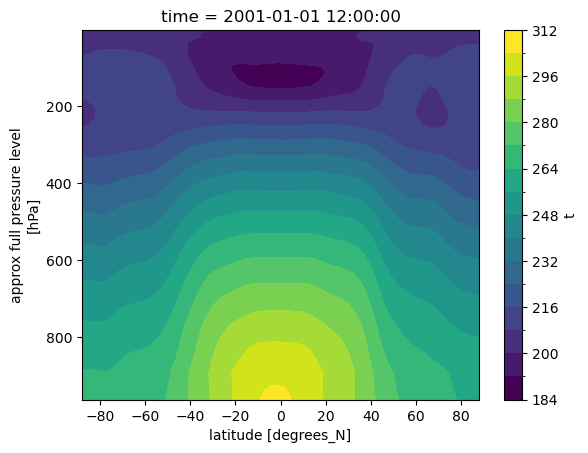

In [ ]:
# spin up has already been removed
temp = delh60_10y.t.mean(('lon')).isel(time=0)
temp.plot.contourf(levels=20, yincrease=False)

### Eddy Feedback Parameter

In [ ]:
delh60_10y_seasonal = delh60_10y.resample(time='90D').mean()
efp_delh60_10y = ef.calculate_efp(delh60_10y_seasonal, data_type='isca')
print(f'No skip: {efp_delh60_10y}')

delh60_10y_skip2 = delh60_10y_seasonal.isel(time=slice(None, None, 2))
efp_delh60_10y_skip2 = ef.calculate_efp(delh60_10y_skip2, data_type='isca')
print(f'Skip 2: {efp_delh60_10y_skip2}')

delh60_10y_skip4 = delh60_10y_seasonal.isel(time=slice(None, None, 4))
efp_delh60_10y_skip4 = ef.calculate_efp(delh60_10y_skip4, data_type='isca')
print(f'Skip 4: {efp_delh60_10y_skip4}')

# plot.plot_isca_correlation(delh60_10y_seasonal, both_hemis=True)

No skip: 0.5825
Skip 2: 0.6161
Skip 4: 0.6411
